# CelebA EDA

In [1]:
import numpy as np
import pandas as pd  
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.image as mpimg
import cv2

import seaborn as sns
sns.set()

%matplotlib inline

## Distribution Analysis

In [2]:
def get_annotation(fnmtxt, columns=None, verbose=True):
    if verbose:
        print("_"*70)
        print(fnmtxt)
    
    rfile = open(fnmtxt, 'r' ) 
    texts = rfile.readlines()
    rfile.close()
    
    if not columns:
        columns = np.array(texts[1].split(" "))
        columns = columns[columns != "\n"]
        texts = texts[2:]
    
    df = []
    for txt in texts:
        txt = np.array(txt.rstrip("\n").split(" "))
        txt = txt[txt != ""]
    
        df.append(txt)
        
    df = pd.DataFrame(df)

    if df.shape[1] == len(columns) + 1:
        columns = ["image_id"]+ list(columns)
    df.columns = columns   
    df = df.dropna()
    if verbose:
        print(" Total number of annotations {}\n".format(df.shape))
        print(df.head())
    ## cast to integer
    for nm in df.columns:
        if nm != "image_id":
            df[nm] = pd.to_numeric(df[nm],downcast="integer")
    return(df)

attr = get_annotation("../data/celeba/list_attr_celeba.txt", verbose=False)

In [3]:
attr

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                    -1    -1     -1        -1        -1          -1  ...   
1                     1    -1     -1        -1         1          -1  ...   
2                    -1    -1     -1         1        -1          -1  ...   
3                    -1    -1     -1        -1        -1          -1  ...   
4                    -1    -1     -1         1        -1          -1  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594               -1    -1     -1         1        -1          -1  ...   
202595               -1    -1      1         1        -1          -1  ...   
202596               -1    -1     -1        -1        -1           1  ...   
202597               -1    -1     -1         1        -1           1  ...   
202598               -1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0              -1        1              1         -1                 1   
1              -1        1             -1         -1                -1   
2              -1       -1             -1          1                -1   
3              -1       -1              1         -1                 1   
4              -1       -1             -1         -1                -1   
...           ...      ...            ...        ...               ...   
202594         -1       -1             -1         -1                -1   
202595         -1        1              1         -1                -1   
202596         -1        1             -1         -1                -1   
202597         -1        1             -1          1                 1   
202598         -1       -1             -1          1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                -1                 1                -1               -1   
1                -1                -1                -1               -1   
2                -1                -1                -1               -1   
3                -1                 1                 1               -1   
4                -1                 1                -1               -1   
...             ...               ...               ...              ...   
202594           -1                 1                -1               -1   
202595           -1                -1                -1               -1   
202596           -1                -1                -1               -1   
202597           -1                 1                -1               -1   
202598           -1                 1                -1               -1   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [4]:
columns = []
for index, attribute_name in enumerate(attr.columns[1:]):
    columns.append(attribute_name)
    #print(f"{index}: {attribute_name}")

In [5]:
for colnm in attr.columns:
    if colnm != "image_id":
        print(" {:20} {:5.2f}%".format(colnm,100*np.mean(attr[colnm] == 1)))

 5_o_Clock_Shadow     11.11%
 Arched_Eyebrows      26.70%
 Attractive           51.25%
 Bags_Under_Eyes      20.46%
 Bald                  2.24%
 Bangs                15.16%
 Big_Lips             24.08%
 Big_Nose             23.45%
 Black_Hair           23.93%
 Blond_Hair           14.80%
 Blurry                5.09%
 Brown_Hair           20.52%
 Bushy_Eyebrows       14.22%
 Chubby                5.76%
 Double_Chin           4.67%
 Eyeglasses            6.51%
 Goatee                6.28%
 Gray_Hair             4.19%
 Heavy_Makeup         38.69%
 High_Cheekbones      45.50%
 Male                 41.68%
 Mouth_Slightly_Open  48.34%
 Mustache              4.15%
 Narrow_Eyes          11.51%
 No_Beard             83.49%
 Oval_Face            28.41%
 Pale_Skin             4.29%
 Pointy_Nose          27.74%
 Receding_Hairline     7.98%
 Rosy_Cheeks           6.57%
 Sideburns             5.65%
 Smiling              48.21%
 Straight_Hair        20.84%
 Wavy_Hair            31.96%
 Wearing_Earri

In [6]:
frequencies = (attr.iloc[:,1:] == 1).mean(axis=0).sort_values()
print(len(frequencies))

40


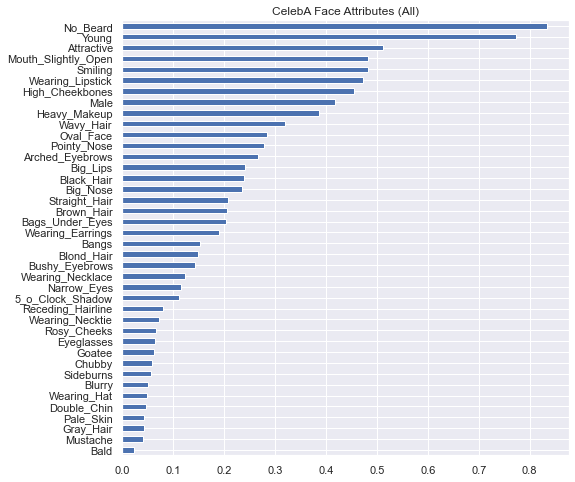

In [7]:
_ = frequencies.plot(title='CelebA Face Attributes (All)', 
                     kind='barh', 
                     figsize=(8, 8))
                     #color='m')

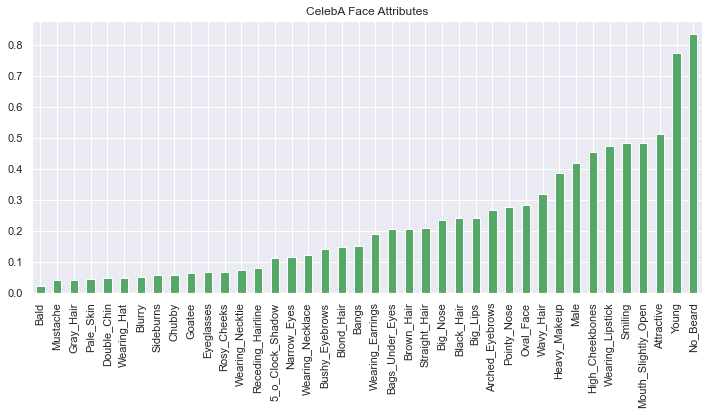

In [8]:
_ = frequencies.plot(title='CelebA Face Attributes', 
                     kind='bar', figsize=(12, 5), color='g')

In [9]:
train_attr = get_annotation("../data/celeba/train_attr_list.txt", columns = columns, verbose=False)
val_attr = get_annotation("../data/celeba/val_attr_list.txt", columns = columns, verbose=False)
test_attr = get_annotation("../data/celeba/test_attr_list.txt", columns = columns, verbose=False)
stat_df = pd.DataFrame(index = columns) #, columns = ['Full','Train','Val','Test'])
stat_df.loc[:,'Full'] = (attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Train'] = (train_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Val'] = (val_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df.loc[:,'Test'] = (test_attr.iloc[:,1:] == 1).mean(axis=0)*100
stat_df

Full      Train        Val       Test
5_o_Clock_Shadow     11.113579  11.167291  11.803493   9.988979
Arched_Eyebrows      26.698059  26.588438  25.841848  28.444044
Attractive           51.250500  51.362659  52.005839  49.584210
Bags_Under_Eyes      20.457159  20.446028  20.742941  20.263501
Bald                  2.244335   2.281133   2.068757   2.119026
Bangs                15.157528  15.165571  14.672573  15.574592
Big_Lips             24.079586  24.091049  15.321891  32.702134
Big_Nose             23.453225  23.555323  24.880455  21.200281
Black_Hair           23.925093  23.902439  20.858710  27.161607
Blond_Hair           14.799185  14.908767  15.382292  13.325318
Blurry                5.089857   5.137310   4.731464   5.059613
Brown_Hair           20.519351  20.391964  24.125434  17.969141
Bushy_Eyebrows       14.216753  14.367512  14.249761  12.954614
Chubby                5.756692   5.768262   6.120703   5.300070
Double_Chin           4.668829   4.651349   4.907636   4.573690
Eyeglasses            6.511878   6.463722   6.961293   6.457269
Goatee                6.276438   6.350679   7.369004   4.583709
Gray_Hair             4.194986   4.236653   4.867368   3.186054
Heavy_Makeup         38.692195  38.431529  39.014446  40.496944
High_Cheekbones      45.503186  45.244824  44.928776  48.181545
Male                 41.675428  41.937089  42.573111  38.648432
Mouth_Slightly_Open  48.342786  48.218959  48.185433  49.509067
Mustache              4.154512   4.080605   5.048573   3.867348
Narrow_Eyes          11.514864  11.592431   7.509941  14.868250
No_Beard             83.493996  83.417706  82.236875  85.367198
Oval_Face            28.414257  28.322787  28.011275  29.561166
Pale_Skin             4.294690   4.303619   4.308653   4.207995
Pointy_Nose          27.744461  27.551760  28.489455  28.574291
Receding_Hairline     7.977828   8.011304   7.192832   8.486124
Rosy_Cheeks           6.572096   6.466179   6.835456   7.173630
Sideburns             5.651064   5.625115   6.880757   4.638814
Smiling              48.208037  47.969528  48.331404  50.030057
Straight_Hair        20.840182  20.855809  20.561736  20.989881
Wavy_Hair            31.956722  31.935860  27.658932  36.404168
Wearing_Earrings     18.892492  18.653314  19.071828  20.664262
Wearing_Hat           4.846026   4.938871   4.731464   4.202986
Wearing_Lipstick     47.243570  46.960128  44.596567  52.189159
Wearing_Necklace     12.296704  12.142287  12.060200  13.791203
Wearing_Necktie       7.271507   7.304786   7.263301   7.008316
Young                77.361685  77.893961  74.656465  75.713856

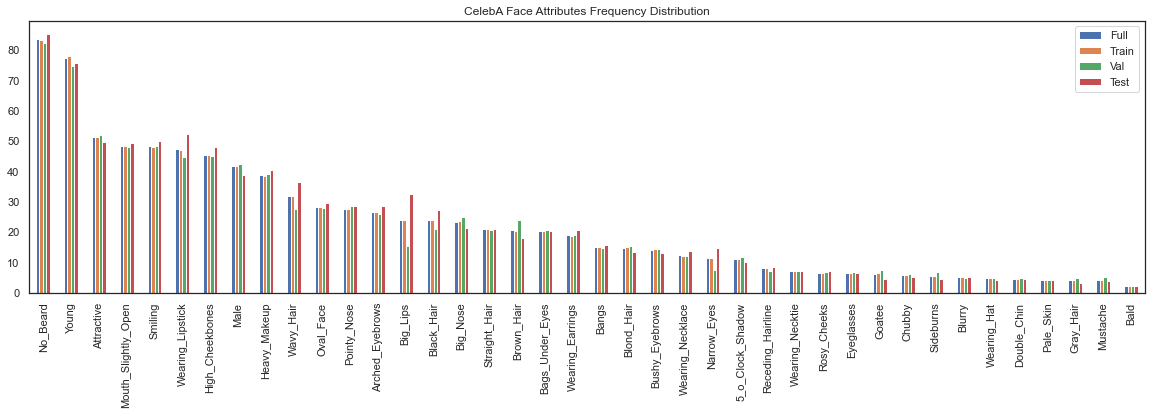

In [10]:
with sns.axes_style('white'):
    stat_df = stat_df.sort_values('Full', ascending=False)
    stat_df.plot(title='CelebA Face Attributes Frequency Distribution', 
                 kind='bar', figsize=(20, 5))
    plt.savefig('freq_dis.jpg', dpi=160, bbox_inches='tight')

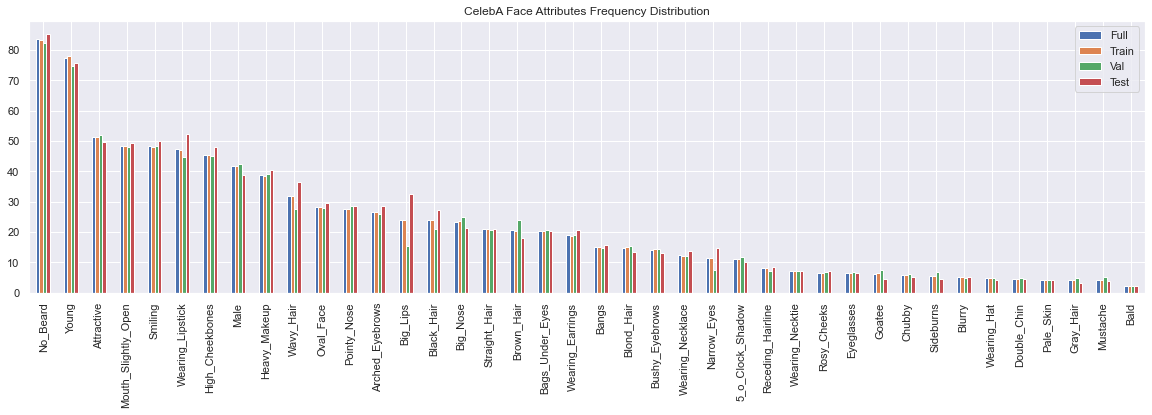

In [11]:
stat_df = stat_df.sort_values('Full', ascending=False)
stat_df.plot(title='CelebA Face Attributes Frequency Distribution', 
             kind='bar', figsize=(20, 5))
plt.savefig('freq_dis.jpg', dpi=160, bbox_inches='tight')

## Label Analysis

### Correlation Plots

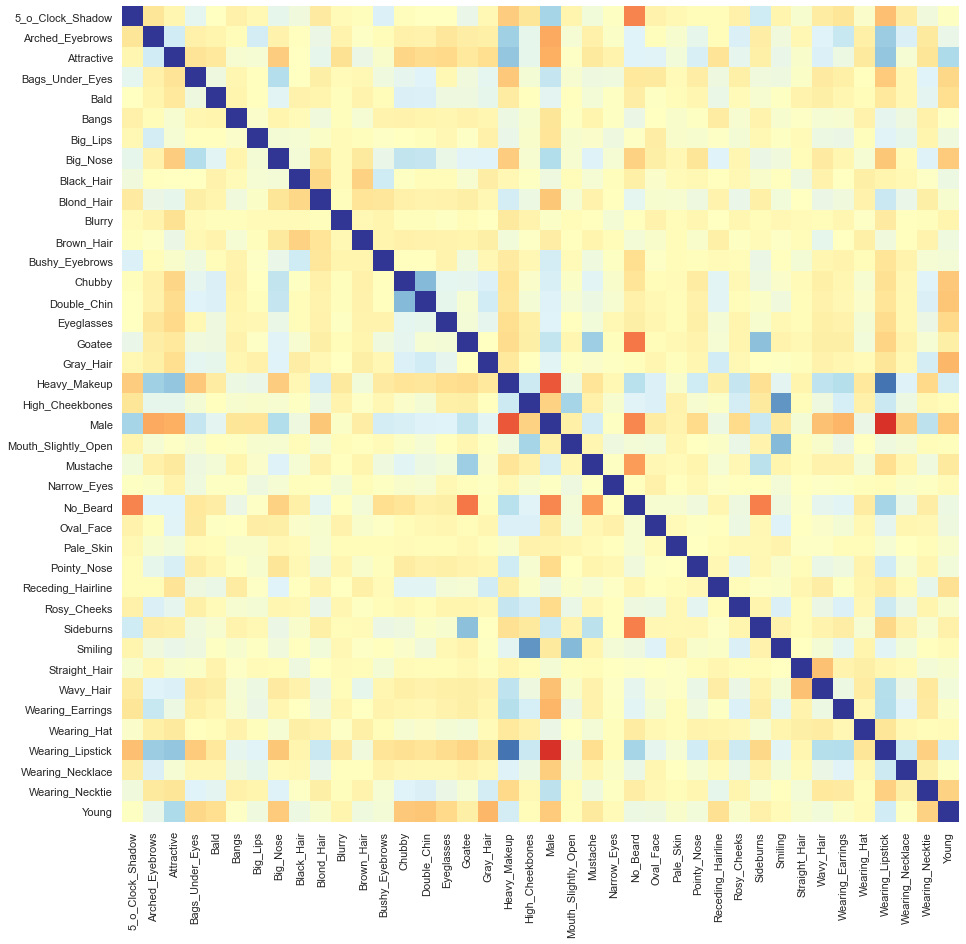

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
attr_corr = attr.loc[:, attr.columns != 'image_id'].corr()
sns.heatmap(attr_corr, cmap="RdYlBu", vmin=-1, vmax=1, cbar=False)
plt.show()

In [13]:
corr = attr.loc[:, attr.columns != 'image_id'].corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr

Wearing_Lipstick  Heavy_Makeup           0.801539
Smiling           High_Cheekbones        0.683497
                  Mouth_Slightly_Open    0.536379
Double_Chin       Chubby                 0.533713
Sideburns         Goatee                 0.512893
                                           ...   
No_Beard          5_o_Clock_Shadow      -0.526946
Sideburns         No_Beard              -0.543061
No_Beard          Goatee                -0.570071
Male              Heavy_Makeup          -0.666724
Wearing_Lipstick  Male                  -0.789435
Length: 780, dtype: float64

### Attribute Checks

In [14]:
print(attr.loc[(attr['Young']==1) & (attr['Gray_Hair']==1),'image_id'].count())
print(attr.loc[(attr['Young']==1) & (attr['Receding_Hairline']==1),'image_id'].count())
print("")
print(attr.loc[(attr['Male']==-1) & (attr['Mustache']==1),'image_id'].count()) #
print(attr.loc[(attr['Male']==-1) & (attr['Goatee']==1),'image_id'].count()) #
print(attr.loc[(attr['Male']==-1) & (attr['Receding_Hairline']==1),'image_id'].count())
print("")
print(attr.loc[(attr['Black_Hair']==1) & (attr['Brown_Hair']==1),'image_id'].count())
print(attr.loc[(attr['Straight_Hair']==1) & (attr['Wavy_Hair']==1),'image_id'].count())
print(attr.loc[(attr['Gray_Hair']==1) & (attr['Blond_Hair']==1),'image_id'].count())
print("")
print(attr.loc[(attr['Male']==1) & (attr['Wearing_Lipstick']==1),'image_id'].count())
print(attr.loc[(attr['Male']==-1) & (attr['Wearing_Lipstick']==1),'image_id'].count())
print(attr.loc[(attr['Male']==-1) & (attr['Wearing_Lipstick']==-1),'image_id'].count()) 
print("")
print(attr.loc[(attr['Wearing_Lipstick']==1) & (attr['Heavy_Makeup']==-1),'image_id'].count())
print(attr.loc[(attr['Wearing_Lipstick']==-1) & (attr['Heavy_Makeup']==1),'image_id'].count())
print("")
print(attr.loc[(attr['Male']==-1) & (attr['Heavy_Makeup']==1),'image_id'].count())
print(attr.loc[(attr['Male']==1) & (attr['Heavy_Makeup']==1),'image_id'].count())
print(attr.loc[(attr['Male']==1) & (attr['Heavy_Makeup']==1) & (attr['Wearing_Lipstick']==-1),'image_id'].count())
print(attr.loc[(attr['Male']==1) & (attr['Wearing_Lipstick']==1) & (attr['Heavy_Makeup']==1) ,'image_id'].count())
print("")
print(attr.loc[(attr['Male']==-1) & (attr['Sideburns']==1),'image_id'].count()) #
print("")
print(attr.loc[(attr['Male']==-1) & (attr['No_Beard']==-1),'image_id']) #

380
8103

3
13
6250

1136
1158
512

523
95192
22973

19195
1870

78156
234
95
139

11

2197      002198.jpg
3258      003259.jpg
3975      003976.jpg
4807      004808.jpg
8356      008357.jpg
             ...    
197608    197609.jpg
198446    198447.jpg
198602    198603.jpg
200451    200452.jpg
202199    202200.jpg
Name: image_id, Length: 139, dtype: object


In [15]:
mis2 = attr.loc[(attr.index == 151645)]
print(mis2['Male'])
print(mis2['Goatee'])
print(mis2['Mustache'])
print(mis2['Sideburns'])
mis2

151645   -1
Name: Male, dtype: int8
151645   -1
Name: Goatee, dtype: int8
151645   -1
Name: Mustache, dtype: int8
151645    1
Name: Sideburns, dtype: int8


image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
151645  151646.jpg                 1               -1          -1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
151645                1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
151645          1       -1             -1         -1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
151645           -1                -1                -1               -1   

        Young  
151645      1  

[1 rows x 41 columns]

In [16]:
misclassified = attr.loc[(attr['Male']==-1) & (attr['Goatee']==1),'image_id']
misclassified[133822] = attr.loc[(attr.index == 133822), 'image_id'].item() # male
misclassified[149023] = attr.loc[(attr.index == 149023), 'image_id'].item() # male
misclassified[151645] = attr.loc[(attr.index == 151645), 'image_id'].item() # male #037583.jpg
misclassified 

11940     011941.jpg
23716     023717.jpg
52694     052695.jpg
90738     090739.jpg
123953    123954.jpg
131972    131973.jpg
133478    133479.jpg
138607    138608.jpg
144260    144261.jpg
145803    145804.jpg
152164    152165.jpg
158020    158021.jpg
162737    162738.jpg
133822    133823.jpg
149023    149024.jpg
151645    151646.jpg
Name: image_id, dtype: object

In [17]:
beard_women = attr.loc[(attr['Male']==-1) & (attr['No_Beard']==-1),'image_id']

#### Plot Misclassified Images

16


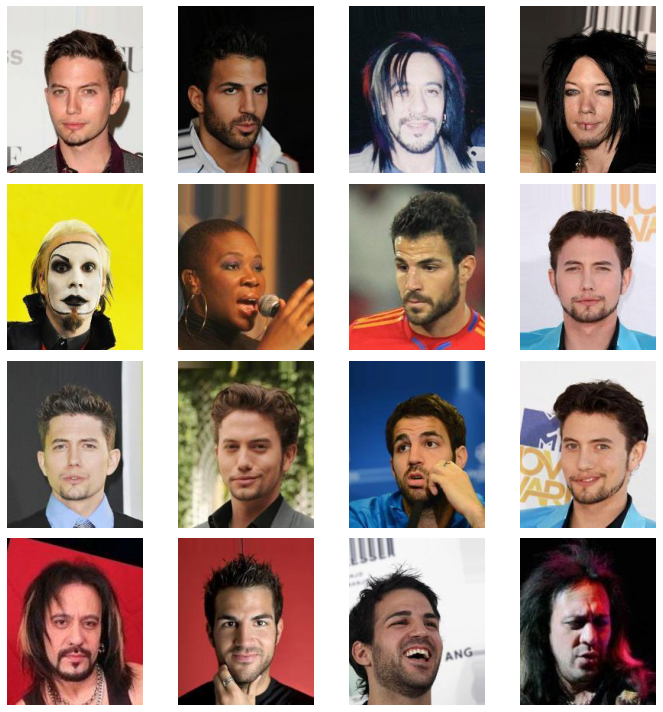

In [18]:
import matplotlib.image as mpimg
print(len(misclassified))
plt.figure(figsize=(10,10))
for i, mis in enumerate(misclassified):
    r = i // 4
    j = i % 4
    plt.subplot2grid((len(misclassified)//4,4), (r,j))
    m_img = os.path.join('../data/celeba/img_align_celeba', mis)
    img = mpimg.imread(m_img)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

8


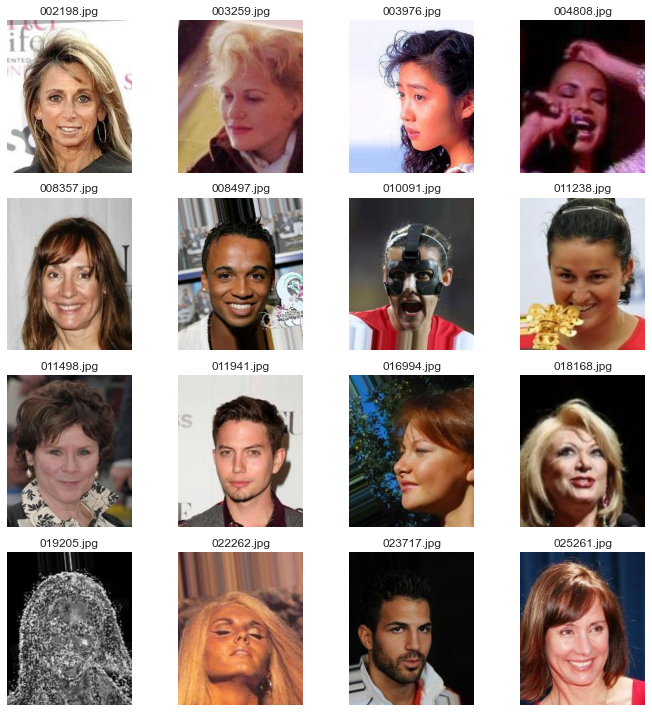

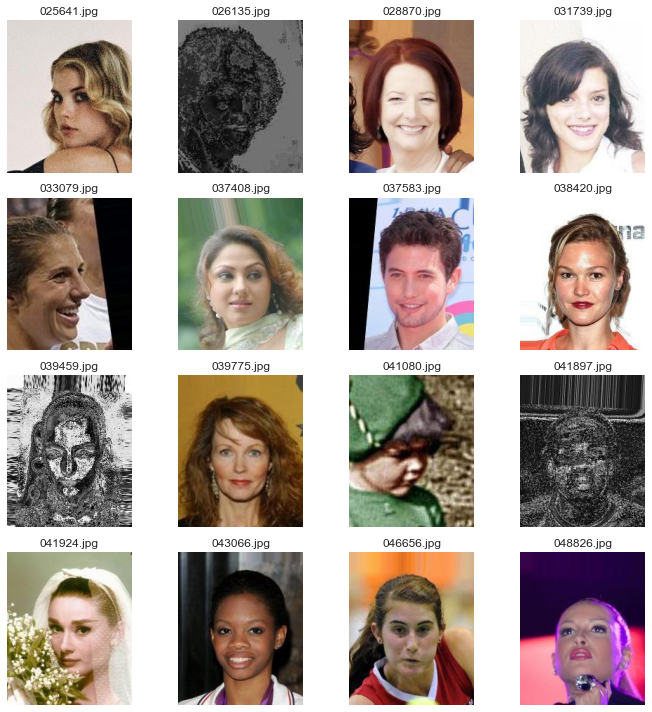

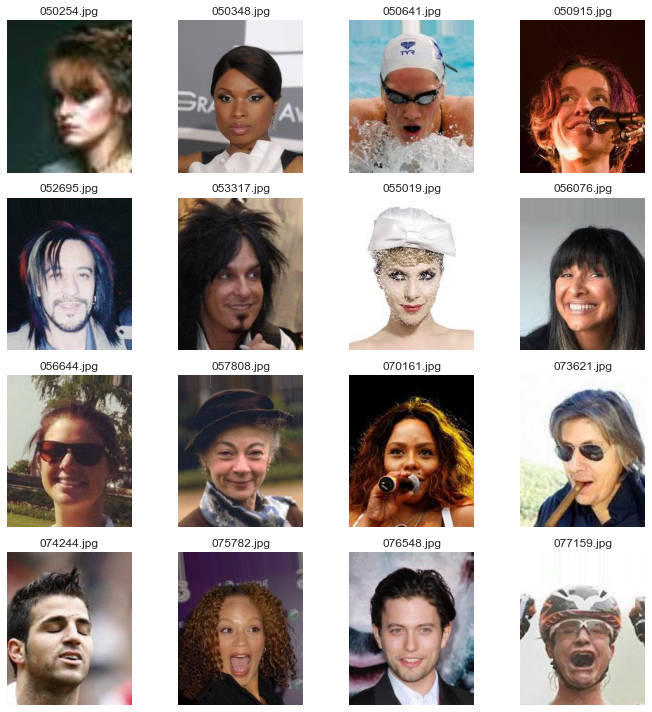

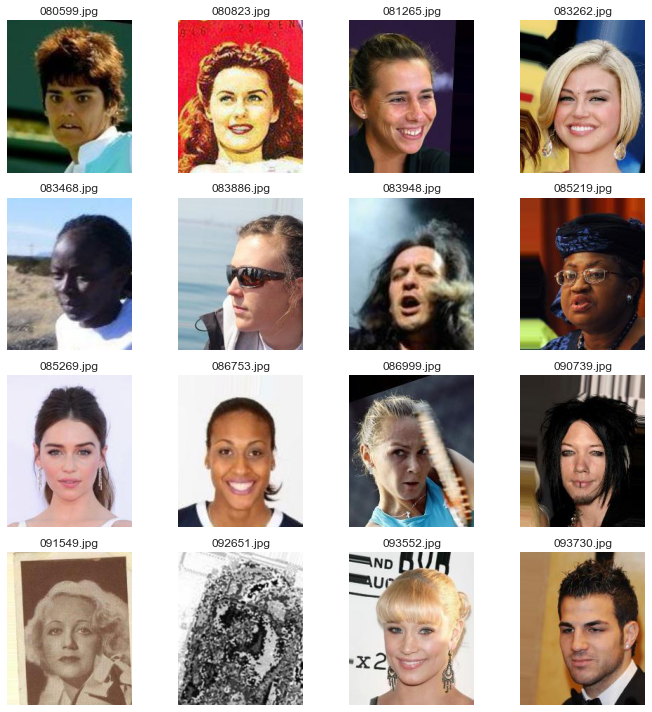

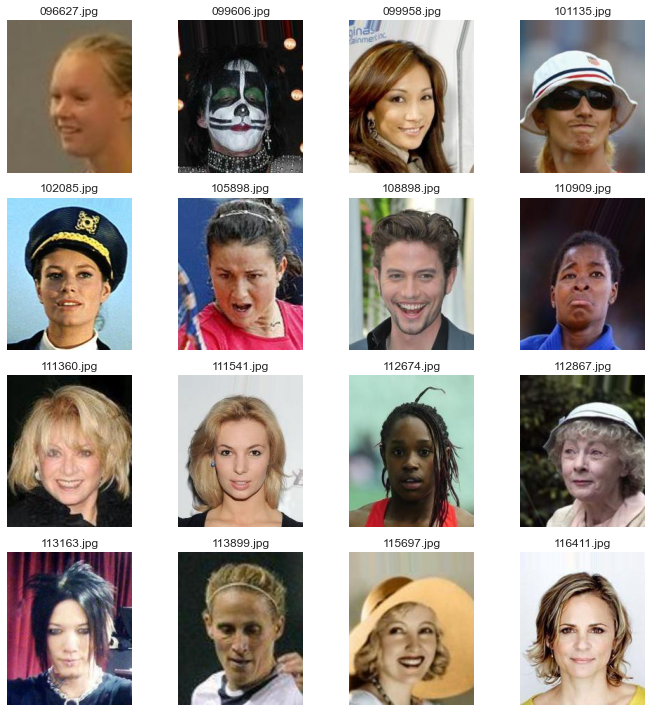

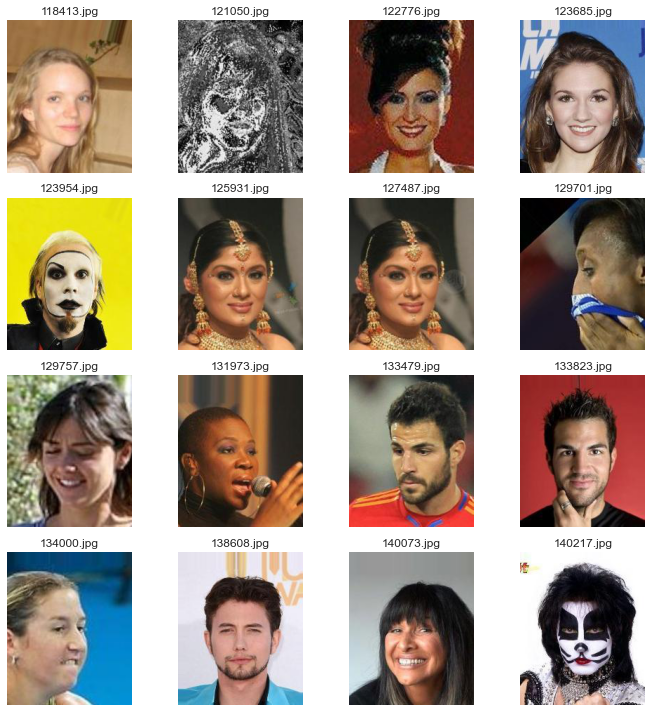

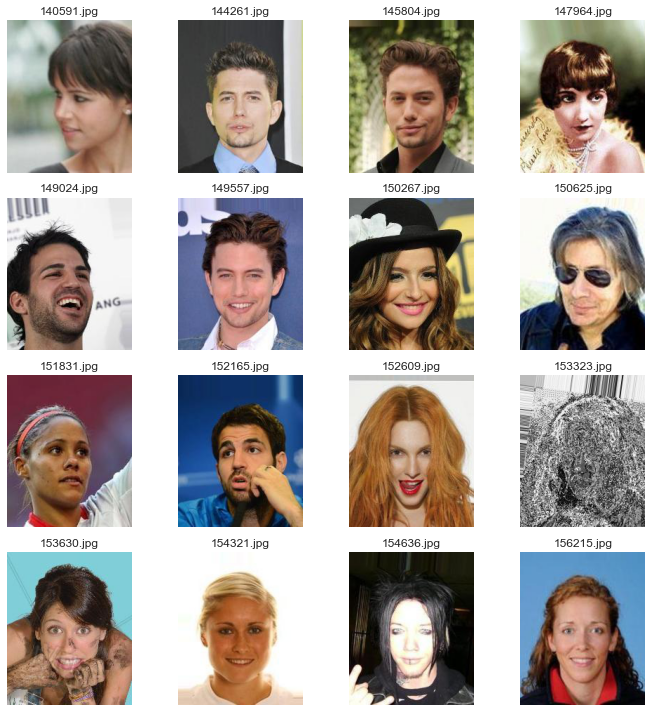

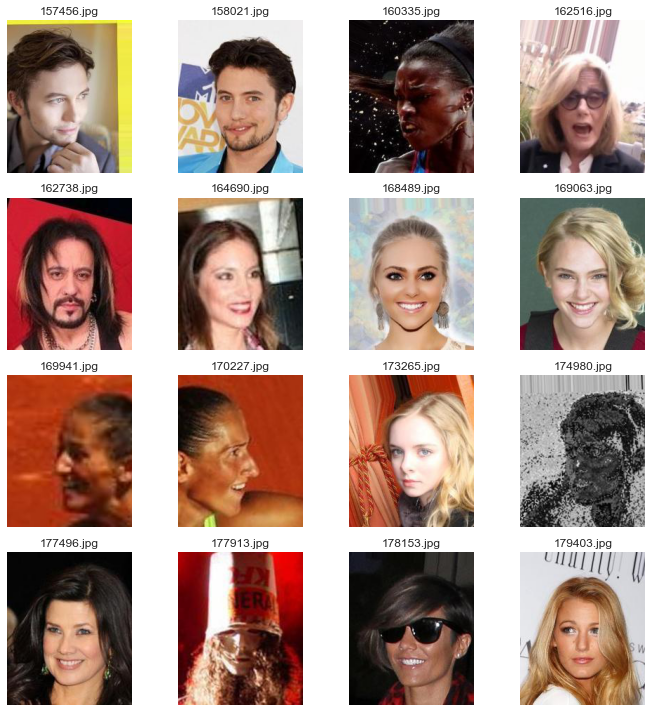

In [19]:
print(len(beard_women)//16)
for batch in range(0, len(beard_women)//16):
    batch_wo = beard_women[batch*16:batch*16+16]
    plt.figure(figsize=(10,10))
    for i, mis in enumerate(batch_wo):
        r = i // 4
        j = i % 4
        plt.subplot2grid((len(batch_wo)//4,4), (r,j))
        m_img = os.path.join('../data/celeba/img_align_celeba', mis)
        img = cv2.imread(m_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = mpimg.imread(m_img)
        plt.imshow(img)
        plt.title(mis)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#### Check where misclassified exist

In [20]:
assert len(train_attr.loc[train_attr['image_id'].isin(misclassified)]) == len(misclassified)
train_attr.loc[train_attr['image_id'].isin(['019205.jpg'])]
# All misclassifed in train_set

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
19204  019205.jpg                 0                0           0   

       Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
19204                0     0      0         0         0           0  ...   

       Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
19204          0        0              0          0                 0   

       Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Young  
19204            0                 0                 1                0      0  

[1 rows x 41 columns]

In [21]:
print(len(train_attr.loc[train_attr['image_id'].isin(beard_women)]))
print(val_attr.loc[val_attr['image_id'].isin(beard_women), 'image_id'])
print(len(test_attr.loc[test_attr['image_id'].isin(beard_women)]))
print(len(beard_women))

117
1919     164690.jpg
5718     168489.jpg
6292     169063.jpg
7170     169941.jpg
7456     170227.jpg
10494    173265.jpg
12209    174980.jpg
14725    177496.jpg
15142    177913.jpg
15382    178153.jpg
16632    179403.jpg
16806    179577.jpg
Name: image_id, dtype: object
10
139


### Check Duplicated Images

In [44]:
# import os
# from PIL import Image, ImageStat
# import json

# image_folder = os.path.join('../data/celeba/', 'check_dup') #img_align_celeba check_dup
# image_files = [_ for _ in os.listdir(image_folder) if _.endswith('jpg')]

# duplicate_files = {}
# duplicate_list = []
# hash_dict = {}

# def get_image_hash(file_path):
#     global hash_dict
#     if not file_path in hash_dict.keys():
#         image_check = Image.open(os.path.join(image_folder, file_path))
#         pix_mean = ImageStat.Stat(image_check).mean
#         hash_dict[file_path] = pix_mean
#     else:
#         pix_mean = hash_dict[file_path]
        
#     return pix_mean

# for i, file_org in enumerate(tqdm(image_files)):
#     if i % 10000 == 0:
#         print(duplicate_files)
        
#     if not file_org in set(duplicate_list):
#         pix_mean1 = get_image_hash(file_org)

#         for file_check in image_files[i+1:]:
#             if not file_check in set(duplicate_list):
#                 pix_mean2 = get_image_hash(file_check)
            
#                 if pix_mean1 == pix_mean2:
#                     if file_org in duplicate_files.keys():
#                         duplicate_files[file_org].extend([file_check])
#                     else:
#                         duplicate_files[file_org] = [file_check]
#                     duplicate_list.append(file_check)
#                     duplicate_list.append(file_org)
#                     hash_dict.pop(file_check)
                    
#         hash_dict.pop(file_org)

# json.dump(duplicate_files, open("duplicated.json",'w'))

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 961.77it/s]

{}


In [45]:
duplicate_files2 = json.load(open("duplicated.json"))
duplicate_files2

{'000002 - Copy.jpg': ['000002.jpg'],
 '000006 - Copy.jpg': ['000006.jpg', '124125.jpg']}